<a href="https://colab.research.google.com/github/swati2697/MLpractice/blob/main/HnadwritingRecognition_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

**Things to Note:**
1. When coding the `class myCallback`, Python 3 will run into an error
```python
TypeError: '>' not supported between instances of 'NoneType' and 'float'
```
when using the code
```python
if(logs.get('accuracy')>0.99):
```

For Python 3, use the following equivalent code line

```python
if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
```

2. You can run the notebook using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf

print(tf.__version__)

2.7.0


In [14]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE
    class myCallBack(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        #if(logs.get('accuracy')>0.99):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
          self.model.stop_training = True
          
    callbacks = myCallBack()
    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    import numpy as np
    np.set_printoptions(linewidth=200)
    import matplotlib.pyplot as plt
    plt.imshow(x_train[400])
    print(y_train[400])
    print(x_train[400])
    
    # YOUR CODE SHOULD START HERE
    x_train = x_train/255.0
    x_test = x_test/255.0
    # YOUR CODE SHOULD END HERE
    
    model = tf.keras.models.Sequential([
        # YOUR CODE HERE,
        tf.keras.layers.Flatten(),
        # YOUR CODE HERE,
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        # YOUR CODE HERE
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(# YOUR CODE HERE
      x_train, y_train, epochs=10, callbacks=[callbacks]
    )
    # model evaluation
    model.evaluate(x_test, y_test)
    return history.epoch, history.history['accuracy'][-1]

2
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  38 113 207 253 255 253 143  38   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  38 219 252 252 252 253 252 252 234 146   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 191 252 239 180  55 196 214 252 252 252  57   6   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 101 176  65   0   0   0  28 199 252 252 253  43   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  25 205 252 253 167   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  29 253 255 253 196   0 

([0, 1, 2, 3, 4, 5, 6], 0.9905166625976562)

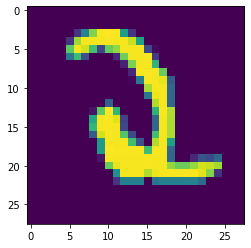

In [15]:
train_mnist()